In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
import sys

In [5]:
sys.path

['/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python310.zip',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/lib-dynload',
 '',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages/mpmath-1.2.1-py3.10.egg']

In [6]:
sys.path.append('../')

In [7]:
from src.utils import find_homo, load_data, plot_5images, cv2_load2rgb
from src.pansharp import brovey_transform, intensity_transform
from src.configs.classification_config import CLASS_NAMES, CLASS_NAMES_LABEL

In [8]:
nb_classes = len(CLASS_NAMES)
IMAGE_SIZE = (150, 150)

## create dataset

In [9]:
datasets_path = ["../Classification_data/train/", "../Classification_data/test/"]

In [10]:
CLASS_NAMES_LABEL

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [11]:
(train_images, train_labels), (test_images, test_labels) = load_data(datasets_path, CLASS_NAMES_LABEL, IMAGE_SIZE)

Loading ../Classification_data/train/


  5%|█▉                                    | 116/2271 [00:00<00:01, 1158.85it/s]

(115, 150, 3)


 25%|█████████▍                            | 563/2271 [00:00<00:01, 1461.91it/s]

(108, 150, 3)
(136, 150, 3)
(108, 150, 3)
(135, 150, 3)


 73%|███████████████████████████▏         | 1668/2271 [00:01<00:00, 1578.11it/s]

(133, 150, 3)
(113, 150, 3)
(113, 150, 3)


 83%|██████████████████████████████▋      | 1815/2191 [00:01<00:00, 1827.07it/s]

(124, 150, 3)


 15%|█████▊                                | 364/2404 [00:00<00:01, 1835.72it/s]

(111, 150, 3)
(134, 150, 3)


 31%|███████████▊                          | 744/2404 [00:00<00:00, 1851.10it/s]

(142, 150, 3)
(149, 150, 3)
(76, 150, 3)


 47%|█████████████████▎                   | 1126/2404 [00:00<00:00, 1884.31it/s]

(111, 150, 3)
(123, 150, 3)
(105, 150, 3)


 71%|██████████████████████████▎          | 1710/2404 [00:00<00:00, 1927.62it/s]

(102, 150, 3)
(143, 150, 3)
(146, 150, 3)
(111, 150, 3)
(120, 150, 3)


 87%|████████████████████████████████▎    | 2100/2404 [00:01<00:00, 1837.13it/s]

(110, 150, 3)
(97, 150, 3)


100%|█████████████████████████████████████| 2404/2404 [00:01<00:00, 1874.94it/s]


(135, 150, 3)
(119, 150, 3)


100%|█████████████████████████████████████| 2382/2382 [00:01<00:00, 1708.83it/s]


(113, 150, 3)


 23%|████████▋                             | 576/2512 [00:00<00:00, 1941.50it/s]

(147, 150, 3)
(103, 150, 3)
(131, 150, 3)
(135, 150, 3)
(144, 150, 3)


 46%|█████████████████                    | 1159/2512 [00:00<00:00, 1910.27it/s]

(100, 150, 3)


 62%|██████████████████████▉              | 1559/2512 [00:00<00:00, 1952.29it/s]

(123, 150, 3)
(136, 150, 3)
(113, 150, 3)
(81, 150, 3)
(143, 150, 3)
(134, 150, 3)


 86%|███████████████████████████████▉     | 2165/2512 [00:01<00:00, 1984.84it/s]

(146, 150, 3)
(141, 150, 3)
(142, 150, 3)


100%|█████████████████████████████████████| 2512/2512 [00:01<00:00, 1955.16it/s]


(144, 150, 3)
(145, 150, 3)


 43%|████████████████▍                     | 981/2274 [00:00<00:00, 2005.26it/s]

(113, 150, 3)


 88%|████████████████████████████████▌    | 1998/2274 [00:01<00:00, 1973.17it/s]

(113, 150, 3)
(113, 150, 3)
(140, 150, 3)


100%|█████████████████████████████████████| 2274/2274 [00:01<00:00, 1912.73it/s]


Loading ../Classification_data/test/


100%|███████████████████████████████████████| 474/474 [00:00<00:00, 1569.73it/s]


(141, 150, 3)


 73%|████████████████████████████▍          | 403/553 [00:00<00:00, 2020.49it/s]

(110, 150, 3)
(149, 150, 3)
(72, 150, 3)


100%|███████████████████████████████████████| 553/553 [00:00<00:00, 1938.51it/s]


(76, 150, 3)


100%|███████████████████████████████████████| 525/525 [00:00<00:00, 1985.69it/s]


(131, 150, 3)
(81, 150, 3)


100%|███████████████████████████████████████| 510/510 [00:00<00:00, 1719.09it/s]


In [12]:
print(len(train_images))
print(len(test_images))

14034
3000


In [13]:
train_labels[:5]

array([1, 1, 1, 1, 1], dtype=int32)

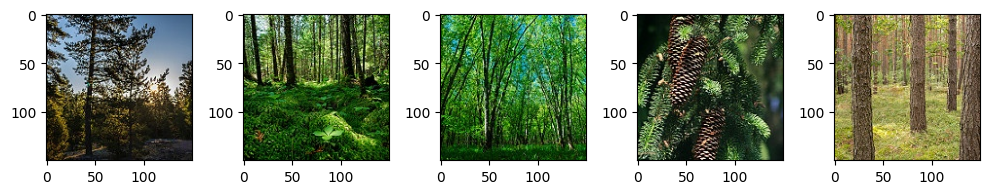

In [14]:
plot_5images(train_images[:5])

We have 5 classes, hence our clasiification is multi-class. Let's try KNN first

## KNN

In [16]:
from src.knn_classification import KnnClassificate

In [26]:
knn = KnnClassificate(k=3, image_size=150*150*3)

In [27]:
knn.train(train_images, train_labels)

In [29]:
predict_test_labels = knn.predict(test_images)

In [30]:
knn.evaluate_model(test_labels, predict_test_labels)

Accuracy 0.36833333333333335
Precision 0.4592567552922011
Recall 0.3578888106971472


## CNN

In [25]:
from src.Convolution_NN import CNN_MODEL, train_cnn, test_cnn

In [16]:
import torch

In [17]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [18]:
device

device(type='mps')

In [36]:
model = CNN_MODEL(num_channels=3).to(device)

In [20]:
from torchvision import transforms
transform=transforms.ToTensor()

In [21]:
train_images = np.array(train_images, dtype="float32")

In [22]:
train_images_tensors = list(map(transform, train_images))

In [23]:
train_data = torch.utils.data.TensorDataset(
    torch.stack(train_images_tensors), 
    torch.from_numpy(np.array(train_labels)))

In [33]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=40, shuffle=True)

In [38]:
model, train_loss_list = train_cnn(train_loader, model, device, num_epochs=5, learning_rate=0.001, weight_decay=0.1)

Epoch 0
Training loss = 1.3405945010674305
Epoch 1
Training loss = 1.0626202898147779
Epoch 2
Training loss = 0.9911027148238614
Epoch 3
Training loss = 0.9595753492792787
Epoch 4
Training loss = 0.9383124432332834


In [39]:
train_loss_list

[1.3405945010674305,
 1.0626202898147779,
 0.9911027148238614,
 0.9595753492792787,
 0.9383124432332834]

In [41]:
test_images = np.array(test_images, dtype="float32")

In [42]:
test_images_tensors = list(map(transform, test_images))

In [47]:
test_data = torch.utils.data.TensorDataset(
    torch.stack(test_images_tensors),
    torch.from_numpy(np.array(test_labels)))

In [51]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=40)

In [52]:
model, test_acc, y_pred = test_cnn(test_loader, model, device)

Test set accuracy = 2564.0 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


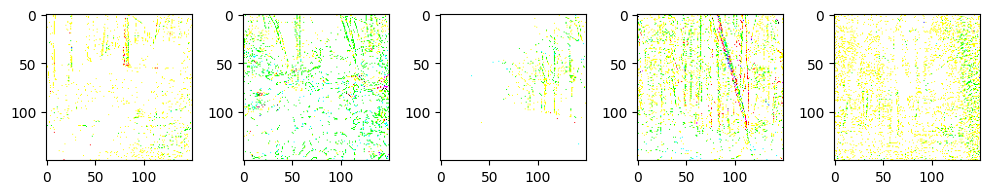

In [55]:
plot_5images(test_images[:5])

In [53]:
y_pred

tensor([2, 4, 4, 3, 2, 3, 2, 2, 4, 3, 2, 4, 2, 4, 2, 2, 2, 4, 3, 2, 2, 2, 3, 2,
        2, 2, 3, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 3, 3], device='mps:0')

In [35]:
torch.cuda.empty_cache()